This notebook demonstrates how the safemotions package can be used to generate torque-limited and collision-free robot trajectories without exceeding limits on the position, velocity, acceleration and jerk of each robot joint.
Note: Colab does not provide a display server, however, it is possible to render videos of the generated movements. 
When running the package on your local machine, you can add the command line argument "--use_gui" for instantaneous visualization. 

Note: The following examples generate random movements. This corresponds to the behavior of a neural network at the beginning of the training phase.
A second notebook is provided to demonstrate the performance of pretrained networks.   


In [ ]:
# First step: install the safemotions package via pip
! pip install pybullet==3.1.6
! pip install safemotions
! pip install gputil
%matplotlib inline
# Use a renderer with hardware acceleration provided that a GPU is available. 
import GPUtil
renderer = "egl" if len(GPUtil.getGPUs()) > 0 else "cpu"
if renderer == "cpu":
  print("Using CPU renderer.")
else:
  print("Using GPU renderer.")

Using GPU renderer.


Run the following code to render a video of a single robot that performs random collision-free motions. <br>
Note: Since the virtual walls around the robot are transparent, only the GPU-based renderer can be used for this example. <br>
When a robot link flashes  <font color='#ff5400'>orange</font>, an alternative safe behavior is executed to avoid a torque limit violation. <font color='#75052d'>Red</font> and <font color='#0000aa'>blue</font> flashing indicates that an alternative safe behavior is performed to prevent a collision with another robot link and a static obstacle, respectively. 



INFO:root:Link 0 table Mass: 600.0 COM pos: (0.0, 0.0, -0.18746) COM orn: (0.0, -0.0, 0.0) Inertia diagonal: (130.36040000000003, 74.2804, 200.5604)
INFO:root:Link 1 iiwa_base_adapter Mass: 1.0 COM pos: (0.0, 0.0, 0.0) COM orn: (0.0, -0.0, 0.0) Inertia diagonal: (0.008912666666666666, 0.008912666666666666, 0.017712666666666668)
INFO:root:Link 2 iiwa_link_0 Mass: 5.0 COM pos: (-0.01, 0.0, 0.07) COM orn: (0.0, -0.0, 0.0) Inertia diagonal: (0.03009836448700693, 0.031921115241897266, 0.039838995826307746)
INFO:root:Link 3 iiwa_link_1 Mass: 3.4525 COM pos: (0.0, -0.03, 0.12) COM orn: (0.0, -0.0, 0.0) Inertia diagonal: (0.030780313915615736, 0.026325579332033302, 0.016050690713148415)
INFO:root:Link 4 iiwa_link_2 Mass: 3.4821 COM pos: (0.0, 0.034417, 0.0673286) COM orn: (0.0, -0.0, 0.0) Inertia diagonal: (0.029615440720188946, 0.025161797435502797, 0.016153847361699503)
INFO:root:Link 5 iiwa_link_3 Mass: 4.05623 COM pos: (0.0, 0.0295, 0.1258) COM orn: (0.0, -0.0, 0.0) Inertia diagonal: (0.04

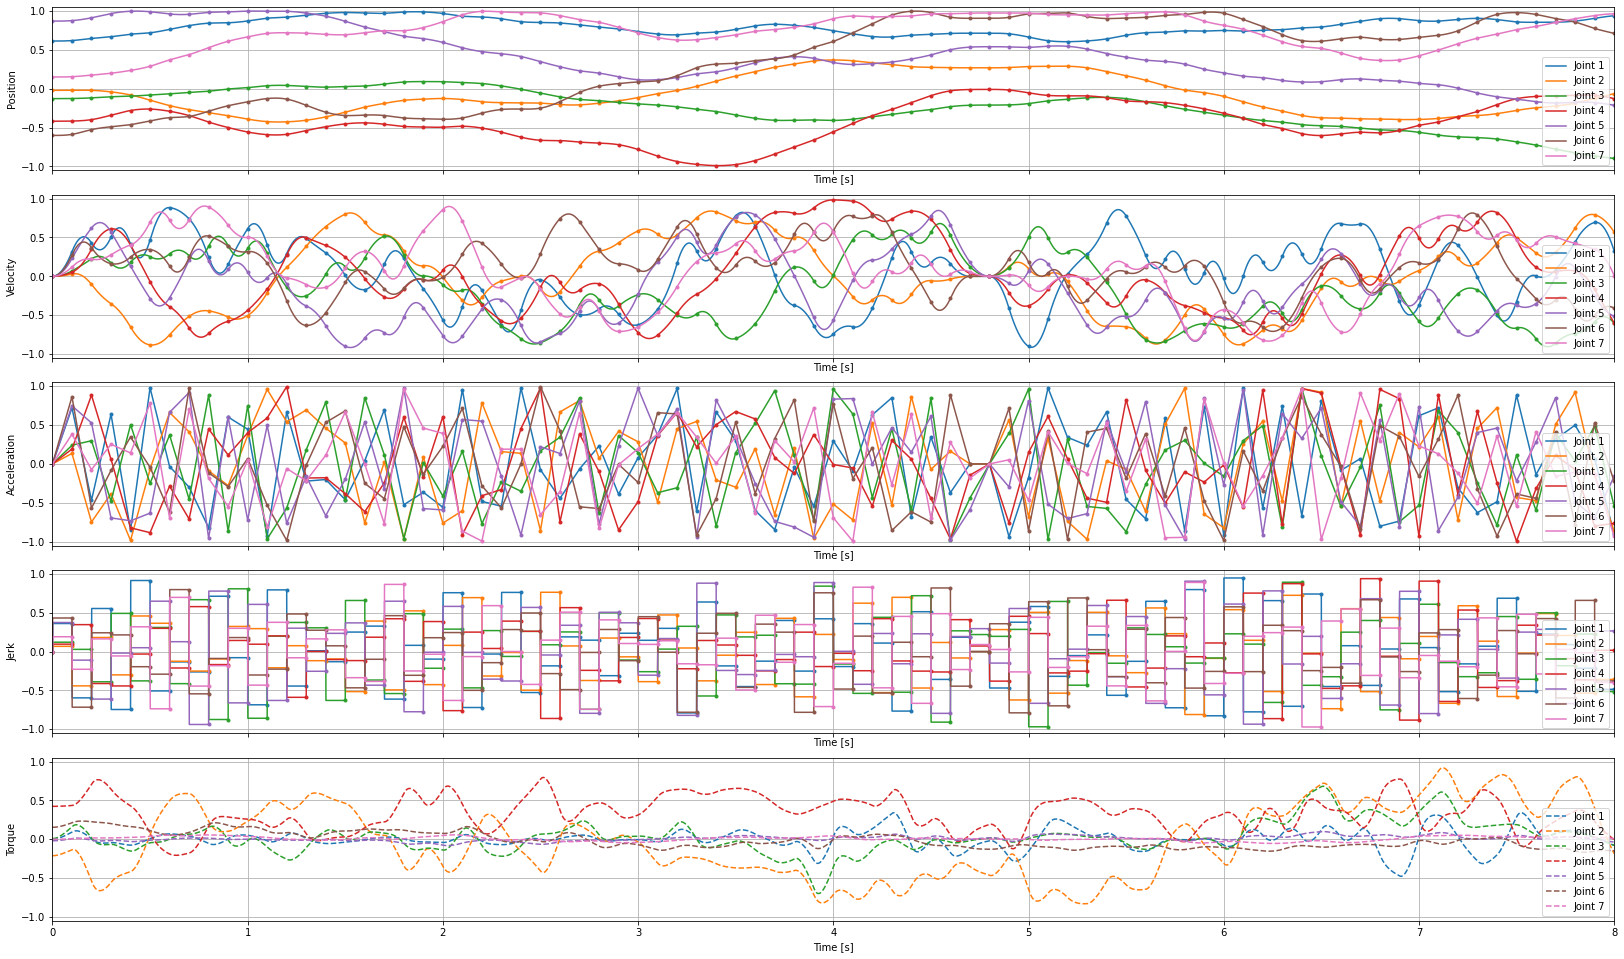

INFO:root:Last episode took 17.082874298095703 seconds. Trajectory duration: 8.0 seconds.
INFO:root:Reward: -11.435146783541574


In [ ]:
import os, safemotions
from IPython.display import HTML, display
from base64 import b64encode
package_dir = os.path.dirname(safemotions.__file__)
video_height = 720
video_frame_rate = 24
video_width = int(16/9 * video_height)
random_agent = os.path.join(package_dir, "random_agent.py")
if renderer == "cpu":
  print("This example requires a GPU-based renderer as the walls around the robot are transparent. Unfortunately, transparency is not supported by the cpu renderer. Try to run the other examples instead.")
else:
  %run -G "$random_agent" --check_braking_trajectory_torque_limits --robot_scene=0 --online_trajectory_duration=8.0 --torque_limit_factor=0.6 --plot_trajectory --episodes=1 --render --renderer=$renderer --video_frame_rate=$video_frame_rate --camera_angle=8 --video_height=$video_height --video_dir="/content"
  video_filename = os.path.join("/content", "episode_1.mp4")
  video_file = open(video_filename,'rb').read()
  url = "data:video/mp4;base64," + b64encode(video_file).decode()
  display(HTML("""<video width="%s" controls><source src="%s" type="video/mp4"></video>""" % (video_width, url)))

For a demonstration scenario with two robots run the following below: 

INFO:root:Link 0 table Mass: 600.0 COM pos: (0.0, 0.0, -0.18746) COM orn: (0.0, -0.0, 0.0) Inertia diagonal: (130.36040000000003, 74.2804, 200.5604)
INFO:root:Link 1 iiwa_base_adapter_r0 Mass: 1.0 COM pos: (0.0, 0.0, 0.0) COM orn: (0.0, -0.0, 0.0) Inertia diagonal: (0.008912666666666666, 0.008912666666666666, 0.017712666666666668)
INFO:root:Link 2 iiwa_link_0_r0 Mass: 5.0 COM pos: (-0.01, 0.0, 0.07) COM orn: (0.0, -0.0, 0.0) Inertia diagonal: (0.03009836448700693, 0.031921115241897266, 0.039838995826307746)
INFO:root:Link 3 iiwa_link_1_r0 Mass: 3.4525 COM pos: (0.0, -0.03, 0.12) COM orn: (0.0, -0.0, 0.0) Inertia diagonal: (0.030780313915615736, 0.026325579332033302, 0.016050690713148415)
INFO:root:Link 4 iiwa_link_2_r0 Mass: 3.4821 COM pos: (0.0, 0.034417, 0.0673286) COM orn: (0.0, -0.0, 0.0) Inertia diagonal: (0.029615440720188946, 0.025161797435502797, 0.016153847361699503)
INFO:root:Link 5 iiwa_link_3_r0 Mass: 4.05623 COM pos: (0.0, 0.0295, 0.1258) COM orn: (0.0, -0.0, 0.0) Inertia 

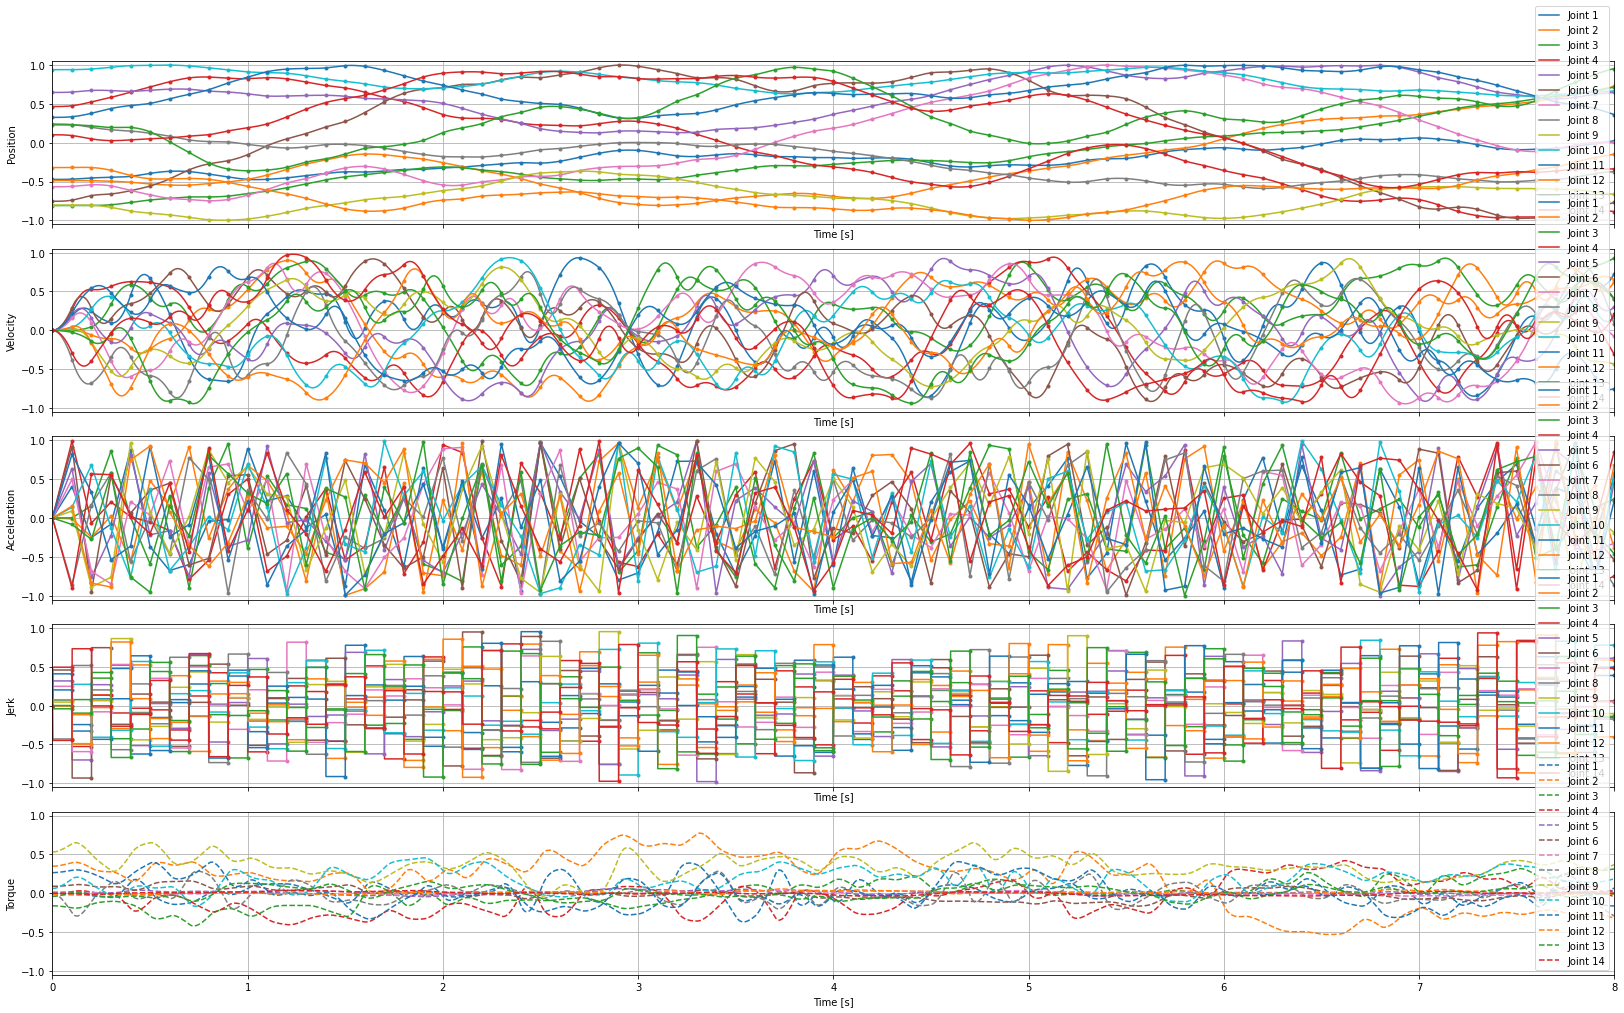

INFO:root:Last episode took 21.6990225315094 seconds. Trajectory duration: 8.0 seconds.
INFO:root:Reward: -30.357900390283955


In [ ]:
import os, safemotions
from IPython.display import HTML
from base64 import b64encode
package_dir = os.path.dirname(safemotions.__file__)
random_agent = os.path.join(package_dir, "random_agent.py")
if renderer == "cpu":
  video_height = 360
  video_frame_rate = 15
else:
  video_height = 720
  video_frame_rate = 24
video_width = int(16/9 * video_height)

%run -G "$random_agent" --check_braking_trajectory_torque_limits --robot_scene=1 --online_trajectory_duration=8.0 --plot_trajectory --episodes=1 --render --renderer=$renderer --video_frame_rate=$video_frame_rate --camera_angle=8 --video_height=$video_height --video_dir="/content"
video_filename = os.path.join("/content", "episode_1.mp4")
video_file = open(video_filename,'rb').read()
url = "data:video/mp4;base64," + b64encode(video_file).decode()
HTML("""<video width="%s" controls><source src="%s" type="video/mp4"></video>""" % (video_width, url))

Finally, collision-free trajectories for three robots can be generated by running the following cell:

INFO:root:Link 0 table Mass: 600.0 COM pos: (0.0, 0.0, -0.18746) COM orn: (0.0, -0.0, 0.0) Inertia diagonal: (130.36040000000003, 74.2804, 200.5604)
INFO:root:Link 1 iiwa_base_adapter_r0 Mass: 1.0 COM pos: (0.0, 0.0, 0.0) COM orn: (0.0, -0.0, 0.0) Inertia diagonal: (0.008912666666666666, 0.008912666666666666, 0.017712666666666668)
INFO:root:Link 2 iiwa_link_0_r0 Mass: 5.0 COM pos: (-0.01, 0.0, 0.07) COM orn: (0.0, -0.0, 0.0) Inertia diagonal: (0.03009836448700693, 0.031921115241897266, 0.039838995826307746)
INFO:root:Link 3 iiwa_link_1_r0 Mass: 3.4525 COM pos: (0.0, -0.03, 0.12) COM orn: (0.0, -0.0, 0.0) Inertia diagonal: (0.030780313915615736, 0.026325579332033302, 0.016050690713148415)
INFO:root:Link 4 iiwa_link_2_r0 Mass: 3.4821 COM pos: (0.0, 0.034417, 0.0673286) COM orn: (0.0, -0.0, 0.0) Inertia diagonal: (0.029615440720188946, 0.025161797435502797, 0.016153847361699503)
INFO:root:Link 5 iiwa_link_3_r0 Mass: 4.05623 COM pos: (0.0, 0.0295, 0.1258) COM orn: (0.0, -0.0, 0.0) Inertia 

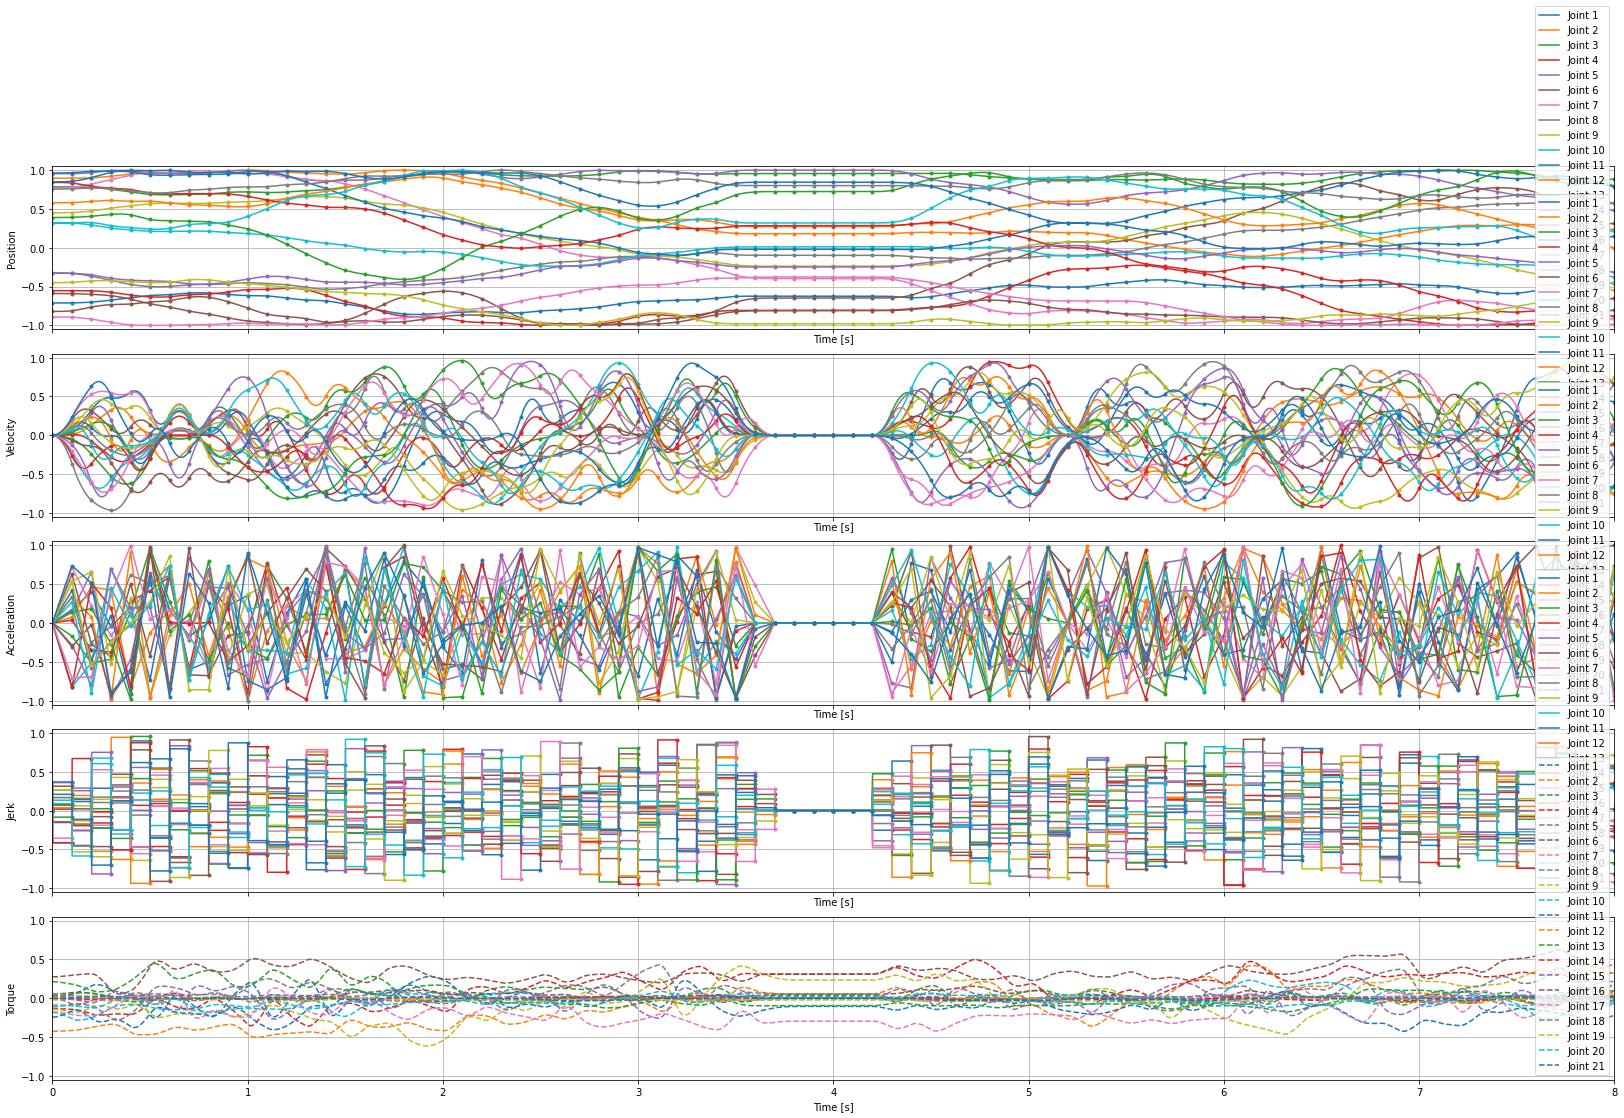

INFO:root:Last episode took 27.60945963859558 seconds. Trajectory duration: 8.0 seconds.
INFO:root:Reward: -38.17590908818072


In [ ]:
import os, safemotions
from IPython.display import HTML
from base64 import b64encode
package_dir = os.path.dirname(safemotions.__file__)
random_agent = os.path.join(package_dir, "random_agent.py")
if renderer == "cpu":
  video_height = 360
  video_frame_rate = 15
else:
  video_height = 720
  video_frame_rate = 24
video_width = int(16/9 * video_height)

%run -G "$random_agent" --check_braking_trajectory_torque_limits --robot_scene=2 --online_trajectory_duration=8.0 --plot_trajectory --episodes=1 --render --renderer=$renderer --video_frame_rate=$video_frame_rate --camera_angle=8 --video_height=$video_height --video_dir="/content"
video_filename = os.path.join("/content", "episode_1.mp4")
video_file = open(video_filename,'rb').read()
url = "data:video/mp4;base64," + b64encode(video_file).decode()
HTML("""<video width="%s" controls><source src="%s" type="video/mp4"></video>""" % (video_width, url))